In [1]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/hla_ii/bin/imports.ipynb")

/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)
/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


##Patient Coverage

In [2]:
clinical = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/mhc_diversity/dataframe.csv', index_col=0)

In [3]:
clinical.head()

,classI,classII,Tissue,Age,Race,homozygous_classI,homozygous_classII,homozygous_total,passenger_coverageI,passenger_coverageII,classI_cat,classII_cat,classI_het,classII_het
TCGA-DH-A7UV,0.494106,0.306483,LGG,49.0,WHITE,1.0,3.0,4.0,0.536184,0.340,other,other,other,homo
TCGA-DH-A7UT,0.554028,0.320236,LGG,30.0,WHITE,1.0,1.0,2.0,0.530702,0.387,high,other,other,het
TCGA-DH-A7UR,0.501965,0.310413,LGG,59.0,WHITE,0.0,0.0,0.0,0.514254,0.361,other,other,het,het
TCGA-DH-A7US,0.441061,0.332024,LGG,50.0,WHITE,0.0,2.0,2.0,0.527412,0.384,low,high,het,het
TCGA-DD-A4NB,0.482318,0.321218,LIHC,25.0,WHITE,0.0,0.0,0.0,0.493421,0.376,other,other,het,het


In [4]:
clinical = clinical.dropna()

0.445972495088 0.293713163065


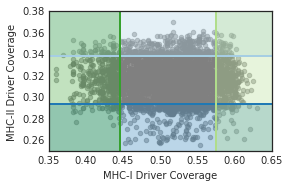

In [15]:
low, high = 0.1, 0.9

print clinical.classI.quantile(low), clinical.classII.quantile(low)

plt.figure(figsize=(4,2.5))

plt.axhline(clinical.classII.quantile(high), color=sns.color_palette("Paired")[0], lw=2)
r1 = plt.Rectangle((0.35, clinical.classII.quantile(high)), 1, 1,
                          fc=sns.color_palette("Paired")[0], alpha=0.3)
plt.gca().add_patch(r1)

plt.axhline(clinical.classII.quantile(low), color=sns.color_palette("Paired")[1], lw=2)
r2 = plt.Rectangle((0, 0), 1, clinical.classII.quantile(low),
                          fc=sns.color_palette("Paired")[1], alpha=0.3)
plt.gca().add_patch(r2)

plt.axvline(clinical.classI.quantile(high), color=sns.color_palette("Paired")[2], lw=2)
r3 = plt.Rectangle((clinical.classI.quantile(high), 0), 1, 1,
                          fc=sns.color_palette("Paired")[2], alpha=0.3)
plt.gca().add_patch(r3)

plt.axvline(clinical.classI.quantile(low), color=sns.color_palette("Paired")[3], lw=2)
r4 = plt.Rectangle((0, 0), clinical.classI.quantile(low), 1,
                          fc=sns.color_palette("Paired")[3], alpha=0.3)
plt.gca().add_patch(r4)

plt.scatter(clinical.classI, clinical.classII, color='grey', alpha=0.5)
plt.xlim(0.35, 0.65)
plt.ylim(0.25, 0.38)

plt.xlabel('MHC-I Driver Coverage')
plt.ylabel('MHC-II Driver Coverage')
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/mhc_diversity/age.scatter.pdf')

In [16]:
#show as violin plot instead

In [17]:
low_low_patients = list(clinical[(clinical.classI < clinical.classI.quantile(low))&(clinical.classII < clinical.classII.quantile(low))].index)
high_high_patients = list(clinical[(clinical.classI > clinical.classI.quantile(high))&(clinical.classII > clinical.classII.quantile(high))].index)
low_high_patients = list(clinical[(clinical.classI < clinical.classI.quantile(low))&(clinical.classII > clinical.classII.quantile(high))].index)
high_low_patients = list(clinical[(clinical.classI > clinical.classI.quantile(high))&(clinical.classII < clinical.classII.quantile(low))].index)
print len(low_low_patients), len(high_high_patients), len(low_high_patients), len(high_low_patients)

35 34 60 44


In [18]:
low_patientsI = list(clinical[(clinical.classI < clinical.classI.quantile(low))].index)
high_patientsI = list(clinical[(clinical.classI > clinical.classI.quantile(high))].index)
low_patientsII = list(clinical[(clinical.classII < clinical.classII.quantile(low))].index)
high_patientsII = list(clinical[(clinical.classII > clinical.classII.quantile(high))].index)
print len(low_patientsI), len(high_patientsI), len(low_patientsII), len(high_patientsII)

462 454 416 450


In [19]:
print sp.ttest_ind(clinical.loc[low_patientsI].Age,
                clinical.loc[high_patientsI].Age)
print sp.ttest_ind(clinical.loc[low_patientsII].Age,
                clinical.loc[high_patientsII].Age)

Ttest_indResult(statistic=-2.3072769658479699, pvalue=0.02126207670395967)
Ttest_indResult(statistic=0.78320128593535099, pvalue=0.43372354466094531)


In [20]:
print clinical.loc[low_patientsI].Age.median()
print clinical.loc[high_patientsI].Age.median()

60.0
62.0


In [21]:
print clinical.loc[low_patientsI].Age.mean()
print clinical.loc[high_patientsI].Age.mean()

58.6060606061
60.845814978


In [25]:
age_df = pd.DataFrame({'Category': ['Low\nMHC-II\nCoverage' for x in clinical.loc[low_patientsII].Age] \
                       + ['High\nMHC-II\nCoverage' for x in clinical.loc[high_patientsII].Age] \
                       + ['Low\nMHC-I\nCoverage' for x in clinical.loc[low_patientsI].Age] \
                       + ['High\nMHC-I\nCoverage' for x in clinical.loc[high_patientsI].Age],
                       'Age': list(clinical.loc[low_patientsII].Age) + list(clinical.loc[high_patientsII].Age) \
                          + list(clinical.loc[low_patientsI].Age) + list(clinical.loc[high_patientsI].Age)})

In [85]:
statistic, p = sp.mannwhitneyu(age_df[age_df.Category == 'Low\nMHC-I & MHC-II\nCoverage'].Age,
             age_df[age_df.Category == 'High\nMHC-I & MHC-II\nCoverage'].Age)

In [86]:
statistic, p = sp.mannwhitneyu(age_df[age_df.Category == 'Low\nMHC-I & MHC-II\nCoverage'].Age,
             age_df[age_df.Category == 'High\nMHC-I & MHC-II\nCoverage'].Age)

In [87]:
sp.mannwhitneyu(age_df[age_df.Category == 'Low\nMHC-I\nCoverage'].Age,
             age_df[age_df.Category == 'High\nMHC-I\nCoverage'].Age)

MannwhitneyuResult(statistic=19854.0, pvalue=0.00055938617094778104)

In [88]:
sp.mannwhitneyu(age_df[age_df.Category == 'Low\nMHC-II\nCoverage'].Age,
             age_df[age_df.Category == 'High\nMHC-II\nCoverage'].Age)

MannwhitneyuResult(statistic=22286.5, pvalue=0.2619353094343696)

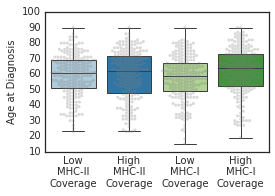

In [91]:
plt.figure(figsize=(4,2.5))
ax = sns.boxplot(x='Category', y='Age', data=age_df, palette=sns.color_palette("Paired"), whis=np.inf)
ax = sns.swarmplot(x='Category', y='Age', data=age_df, color='grey', size=3, alpha=.3)
plt.xlabel('')
plt.ylabel('Age at Diagnosis')
#plt.title('P-value: {0}'.format(round(p, 4)))
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/mhc_diversity/age.boxplots.pdf')

In [33]:
clinical.loc[low_patientsI].Tissue.value_counts()

LIHC    24
THCA    18
SKCM    17
STAD    17
GBM     15
HNSC    14
LGG     14
BLCA    13
KIRC    13
LUAD    13
KIRP     8
LUSC     8
PAAD     7
BRCA     6
COAD     5
PRAD     5
OV       4
UCEC     3
KICH     3
CESC     3
READ     2
DLBC     1
Name: Tissue, dtype: int64

In [63]:
clinical.loc[high_patientsI].Tissue.value_counts()

HNSC    25
LGG     20
SKCM    19
BLCA    17
PAAD    14
LUSC    14
THCA    13
COAD    13
KIRP    11
GBM     11
KIRC    11
LIHC    10
LUAD    10
STAD     9
OV       6
PRAD     5
BRCA     4
KICH     3
UCEC     3
READ     1
Name: Tissue, dtype: int64

In [194]:
for cell in clinical.columns[14:]:
    print cell, sp.mannwhitneyu(clinical.loc[low_low_patients][cell],
                    clinical.loc[high_high_patients][cell])

B cells naive MannwhitneyuResult(statistic=1462.5, pvalue=0.22890257066490843)
B cells memory MannwhitneyuResult(statistic=1559.0, pvalue=0.40579361837353839)
Plasma cells MannwhitneyuResult(statistic=1270.5, pvalue=0.025795512216046021)
T cells CD8 MannwhitneyuResult(statistic=1425.5, pvalue=0.16885143191679108)
T cells CD4 naive MannwhitneyuResult(statistic=1560.5, pvalue=0.34195040891799589)
T cells CD4 memory resting MannwhitneyuResult(statistic=1396.0, pvalue=0.1309585726632207)
T cells CD4 memory activated MannwhitneyuResult(statistic=1425.0, pvalue=0.1272553112712192)
T cells follicular helper MannwhitneyuResult(statistic=1207.0, pvalue=0.0075706660958651294)
T cells regulatory (Tregs) MannwhitneyuResult(statistic=1336.5, pvalue=0.058980286112663732)
T cells gamma delta MannwhitneyuResult(statistic=1578.5, pvalue=0.404234522738532)
NK cells resting MannwhitneyuResult(statistic=1583.5, pvalue=0.48001579029087399)
NK cells activated MannwhitneyuResult(statistic=1499.0, pvalue=0.29

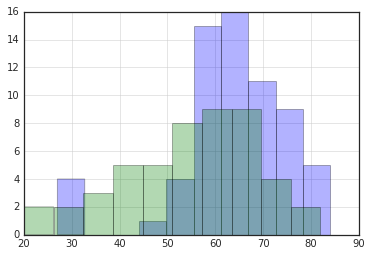

In [70]:
clinical.loc[high_high_patients].Age.hist(alpha=0.3)
clinical.loc[low_low_patients].Age.hist(alpha=0.3)